In [2]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [ ]:
df = pd.read_json(r'/content/drive/MyDrive/University/DM/HW3/movie_synopsis.json')
df.to_csv('/content/drive/MyDrive/University/DM/HW3/movie_synopsis.csv')

In [3]:
movie_synopsis = pd.read_csv(r"/content/drive/MyDrive/University/DM/HW3/movie_synopsis.csv")
movie_info = pd.read_csv(r"/content/drive/MyDrive/University/DM/HW3/movie_info.csv")

In [4]:
movie_synopsis

,_key,imdbID,plot_synopsis,local_id,plot_source
0,1,tt0114709,"A boy called Andy Davis (voice: John Morris) uses his toys to act out a bank robbery. The bank is a cardboard box, the robber is Mr. Potato Head (voice: Don Rickles) assisted by Slinky Dog (voice: Jim Varney), and the bystanders include Bo Peep (voice: Annie Potts) and her sheep. The day is save...",1,imdb
1,2,tt0113189,"The story opens in 1986, in the Cold War Soviet Union. British secret agent James Bond (Pierce Brosnan) and his fellow 00 agent, Alec Trevelyan (Sean Bean), have infiltrated a secret Soviet chemical weapons production facility with the intention of destroying it. After finding their target, a la...",2,imdb
2,3,tt0113101,"The film begins with Ted the Bellhop (Tim Roth) in a room filled with hotel memorabilia, talking to Sam the Bellhop (Marc Lawrence) about what a bellhop is. It's New Year's Eve.""The Missing Ingredient"" begins with a bunch of women (including Madonna and Lili Taylor) converging in the Honeymoon S...",3,imdb
3,4,tt0113161,"Chilli Palmer (John Travolta) is a loan shark living in Miami, Florida. While sitting in a restaurant on an unusually cold day, he's approached by the cantankerous and egotistical Ray 'Bones' Barboni (Dennis Farina). Bones mocks Chilli's name in reference to the cold weather and leaves with his ...",4,imdb
4,5,tt0112722,"After giving a guest lecture on criminal psychology at a local university, Dr. Helen Hudson, a respected field expert on serial killers, is cornered in the lecture hall's restroom by one of her previous subjects, Daryll Lee Cullum, who has escaped from prison. He kills a police officer and bruta...",5,imdb
...,...,...,...,...,...
1676,1678,NaN,"The film opens on two human forms, which soon reveal themselves to be that of a young man and a frail old woman. They recline in a silence broken only by whispers and indistinguishable noises. The young man is the son (Alexei Ananishnov) who is taking care of his exhausted sick mother (Gudrun Ge...",1678,wiki
1677,1679,tt0120594,"Alan (Jared Harris) is a schoolteacher in London who also moonlights as a jazz disc jockey for a hospital PA system. One night after work, he goes to a bar and sees Beatrice (Asia Argento) a beautiful woman who is arguing with two men. Alan is immediately captivated by Beatrice and begins to pu...",1679,wiki
1678,1680,tt0120148,"The film follows Helen Quilley (Gwyneth Paltrow), a young Englishwoman living in London who has just been fired from her public relations job. The plot splits into two parallel universes, based on the two paths her life could take depending on whether she catches a London Underground train or no...",1680,imdb
1679,1681,tt0111804,NaN,1681,wiki


In [5]:
movie_info

,locale_id,title,id_imdb,genre_imdb
0,1,Toy Story (1995),tt0114709,Animation|Adventure|Comedy|Family|Fantasy
1,2,GoldenEye (1995),tt0113189,Action|Adventure|Thriller
2,3,Four Rooms (1995),tt0113101,Comedy
3,4,Get Shorty (1995),tt0113161,Comedy|Crime|Thriller
4,5,Copycat (1995),tt0112722,Drama|Mystery|Thriller
...,...,...,...,...
1677,1678,Mat' i syn (1997),NaN,NaN
1678,1679,B. Monkey (1998),tt0120594,Crime|Drama|Romance|Thriller
1679,1680,Sliding Doors (1998),tt0120148,Comedy|Drama|Fantasy|Romance
1680,1681,You So Crazy (1994),tt0111804,Documentary|Comedy


In [6]:
movie_synopsis = movie_synopsis.rename(columns={'local_id':'locale_id'})
movies = pd.merge(movie_synopsis, movie_info[['locale_id','title', 'id_imdb', 'genre_imdb']], on = 'locale_id')
movies = movies.drop(['id_imdb', '_key', 'plot_source', 'imdbID'], axis=1)

In [7]:
movies.dropna(axis = 0 ,inplace = True)
movies = movies.reset_index()

In [8]:
genres = []
for i in movies['genre_imdb']:
  genres.append(i.split("|"))
movies['genre_imdb'] = genres

In [9]:
movies

,index,plot_synopsis,locale_id,title,genre_imdb
0,0,"A boy called Andy Davis (voice: John Morris) uses his toys to act out a bank robbery. The bank is a cardboard box, the robber is Mr. Potato Head (voice: Don Rickles) assisted by Slinky Dog (voice: Jim Varney), and the bystanders include Bo Peep (voice: Annie Potts) and her sheep. The day is save...",1,Toy Story (1995),"[Animation, Adventure, Comedy, Family, Fantasy]"
1,1,"The story opens in 1986, in the Cold War Soviet Union. British secret agent James Bond (Pierce Brosnan) and his fellow 00 agent, Alec Trevelyan (Sean Bean), have infiltrated a secret Soviet chemical weapons production facility with the intention of destroying it. After finding their target, a la...",2,GoldenEye (1995),"[Action, Adventure, Thriller]"
2,2,"The film begins with Ted the Bellhop (Tim Roth) in a room filled with hotel memorabilia, talking to Sam the Bellhop (Marc Lawrence) about what a bellhop is. It's New Year's Eve.""The Missing Ingredient"" begins with a bunch of women (including Madonna and Lili Taylor) converging in the Honeymoon S...",3,Four Rooms (1995),[Comedy]
3,3,"Chilli Palmer (John Travolta) is a loan shark living in Miami, Florida. While sitting in a restaurant on an unusually cold day, he's approached by the cantankerous and egotistical Ray 'Bones' Barboni (Dennis Farina). Bones mocks Chilli's name in reference to the cold weather and leaves with his ...",4,Get Shorty (1995),"[Comedy, Crime, Thriller]"
4,4,"After giving a guest lecture on criminal psychology at a local university, Dr. Helen Hudson, a respected field expert on serial killers, is cornered in the lecture hall's restroom by one of her previous subjects, Daryll Lee Cullum, who has escaped from prison. He kills a police officer and bruta...",5,Copycat (1995),"[Drama, Mystery, Thriller]"
...,...,...,...,...,...
1404,1671,There's this detective dude who's hired to follow some guy's wife because she keeps getting herself into trouble. She suffers from severe headaches and loss of memory. She never seems to know what's going on. it turns out she's got a split personality. This split personality is the one getting h...,1673,Mirage (1995),"[Action, Thriller]"
1405,1674,"Jeremy Collier is a returning Vietnam War hero whose experiences leave him unable to adjust to the quiet realities of small-town life. Bob Collier, Jeremy's father, expects his son to go back to his life as it was, without understanding the problems of PTSD. Jeremy's mother, Maurine, treats him ...",1676,"War at Home, The (1996)",[Drama]
1406,1675,"Angel celebrates the birth of his daughter by taking his first hit of crack cocaine. With the hesitant support of his wife, Monika, he joins a friend of his to deal drugs for a short time—enough time to get out of debt and buy some nice things for the family. Three years later, Angel is still de...",1677,Sweet Nothing (1995),[Drama]
1407,1677,"Alan (Jared Harris) is a schoolteacher in London who also moonlights as a jazz disc jockey for a hospital PA system. One night after work, he goes to a bar and sees Beatrice (Asia Argento) a beautiful woman who is arguing with two men. Alan is immediately captivated by Beatrice and begins to pu...",1679,B. Monkey (1998),"[Crime, Drama, Romance, Thriller]"


In [11]:
# get all genre tags in a list
all_genres = sum(genres,[])
all_genres = nltk.FreqDist(all_genres)
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 'Count': list(all_genres.values())})

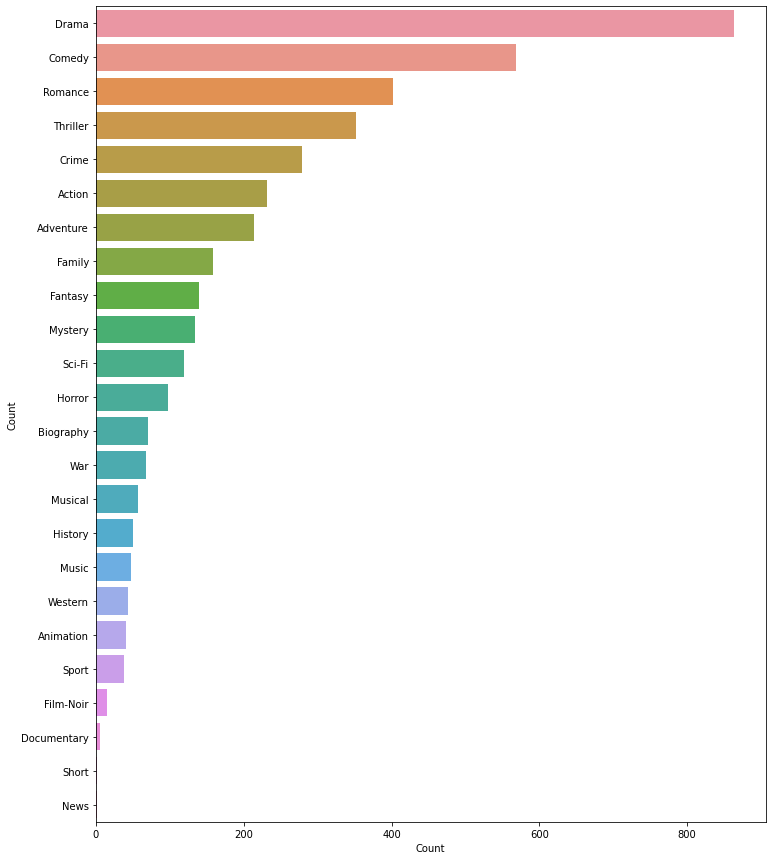

In [12]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15))
ax = sns.barplot(data=g, x= "Count", y = "Genre")
ax.set(ylabel = 'Count')
plt.show()

In [13]:
# function for text cleaning
def clean_text(text):
    # remove backslash-apostrophe
    text = re.sub("\'", "", text)
    # remove everything alphabets
    text = re.sub("[^a-zA-Z]"," ",text)
    # remove whitespaces
    text = ' '.join(text.split())
    # convert text to lowercase
    text = text.lower()
    
    return text

In [14]:
movies['clean_plot'] = movies['plot_synopsis'].apply(lambda x: clean_text(x))
movies[['plot_synopsis', 'clean_plot']].sample(3)

,plot_synopsis,clean_plot
1173,"Delta of Venus is the sultry adventure of Elena Martin (Audie England), a young female American writer in Paris during the dawn of WWII. All of the stories Elena writes involves her as the star of her own erotic adventures which are secretly contracted by her lover, Lawrence Walters (Costas Mand...",delta of venus is the sultry adventure of elena martin audie england a young female american writer in paris during the dawn of wwii all of the stories elena writes involves her as the star of her own erotic adventures which are secretly contracted by her lover lawrence walters costas mandylor f...
473,"In 1953, 10-year-old Larry Flynt is selling moonshine in Kentucky. Twenty years later, Flynt (Woody Harrelson) and his younger brother, Jimmy (Brett Harrelson) run the Hustler Go-Go club in Cincinnati. With profits down, Flynt decides to publish a newsletter for the club, the first Hustler magaz...",in year old larry flynt is selling moonshine in kentucky twenty years later flynt woody harrelson and his younger brother jimmy brett harrelson run the hustler go go club in cincinnati with profits down flynt decides to publish a newsletter for the club the first hustler magazine with nude pictu...
102,"The Truth About Cats and Dogs is the story of two youngish women with good hearts and insecurity, who live in the same building. One is an intelligent brunette veterinarian of average looks, with her own radio show about caring for pets; the other is a blonde beginner fashion model of modest int...",the truth about cats and dogs is the story of two youngish women with good hearts and insecurity who live in the same building one is an intelligent brunette veterinarian of average looks with her own radio show about caring for pets the other is a blonde beginner fashion model of modest intelle...


In [15]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = nltk.FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(12,15))
  ax = sns.barplot(data=d, x= "count", y = "word")
  ax.set(ylabel = 'Word')
  plt.show()

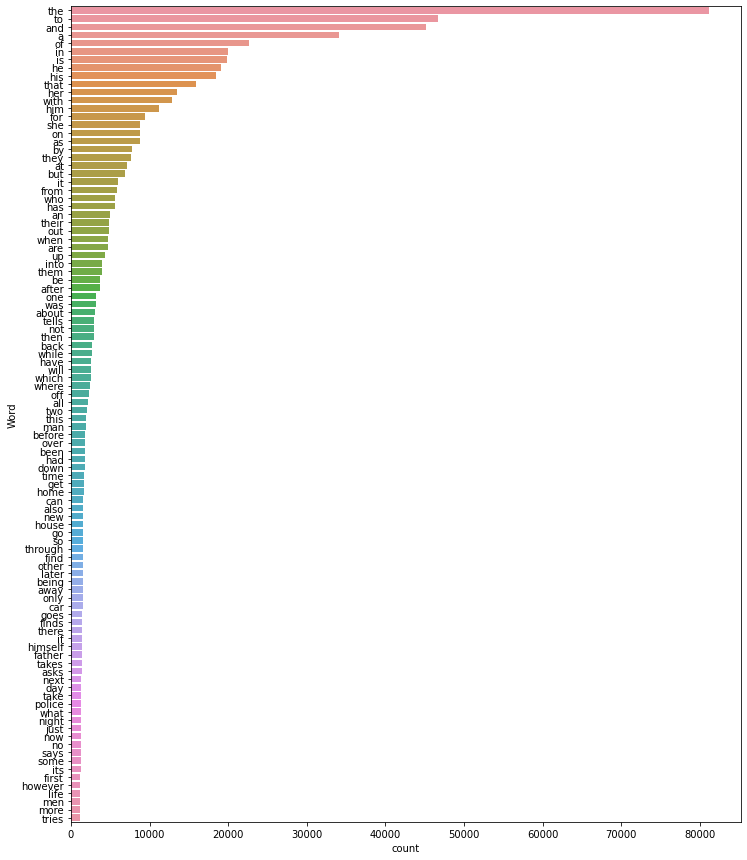

In [16]:
# print 100 most frequent words
freq_words(movies['clean_plot'], 100)

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)
  
movies['clean_plot'] = movies['clean_plot'].apply(lambda x: remove_stopwords(x))

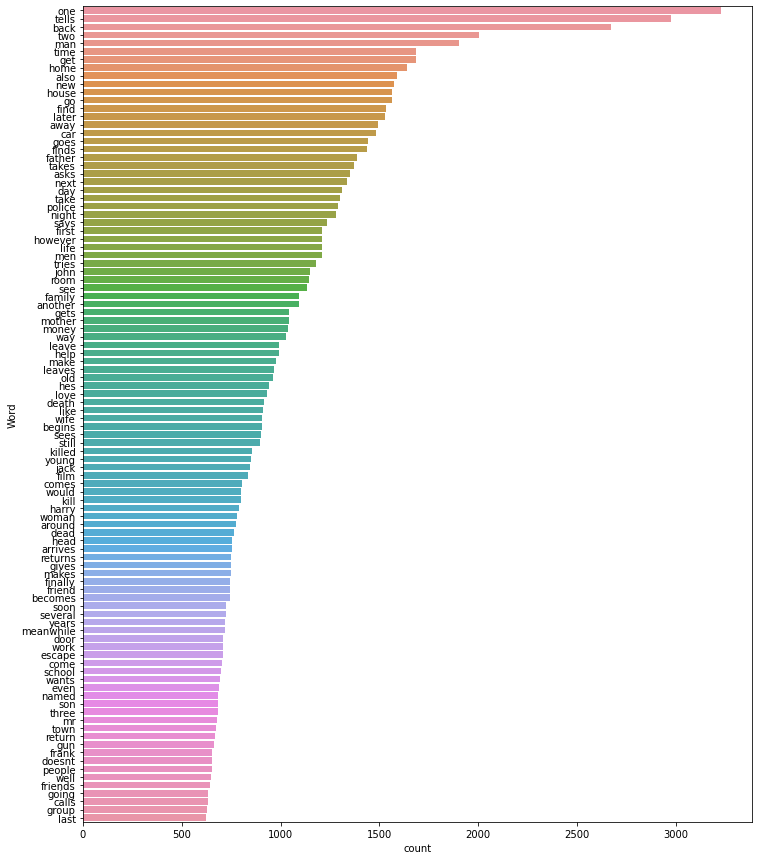

In [19]:
freq_words(movies['clean_plot'], 100)

In [20]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(movies['genre_imdb'])

# transform target variable
y = multilabel_binarizer.transform(movies['genre_imdb'])

In [21]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [22]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(movies['clean_plot'], y, test_size=0.2, random_state=9)

In [23]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [29]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

# evaluate performance
f1_score(yval, y_pred, average="micro")

0.3275705186533212

In [30]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.5094217024041586

In [31]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [32]:
for i in range(5):
    k = xval.sample(1).index[0]
    print("Movie: ", movies['title'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",movies['genre_imdb'][k], "\n")   

Movie:  How to Make an American Quilt (1995) 
Predicted genre:  [('Drama',)]
Actual genre:  ['Comedy', 'Drama', 'Romance'] 

Movie:  Boys, Les (1997) 
Predicted genre:  [('Comedy', 'Drama')]
Actual genre:  ['Comedy', 'Drama', 'Sport'] 

Movie:  Family Thing, A (1996) 
Predicted genre:  [('Drama',)]
Actual genre:  ['Comedy', 'Drama'] 

Movie:  Mina Tannenbaum (1994) 
Predicted genre:  [('Drama',)]
Actual genre:  ['Drama'] 

Movie:  Yankee Zulu (1994) 
Predicted genre:  [('Drama',)]
Actual genre:  ['Comedy', 'Drama'] 



In [33]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
for eps in [0.125,0.25,0.5,1,2,3,4,5]:
    for min_samples in range(1,50):
        db = DBSCAN(eps=eps, min_samples=min_samples)
        y = db.fit_predict(xtrain_tfidf)
        if len(set(db.labels_))>4 and len(set(db.labels_))<249:
            print (str(eps) + " " + str(min_samples) + ": "+ str(silhouette_score(xtrain_tfidf, db.labels_, metric='euclidean')))
            

0.125 2: 0.004837730460302407
0.25 2: 0.004837730460302407
0.5 2: 0.003769860089987392
1 2: 0.0072634027982073105
1 3: -0.0032491386164149923


In [34]:
db = DBSCAN(eps=1, min_samples=2).fit(xtrain_tfidf)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dbscanlabels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscanlabels)) - (1 if -1 in dbscanlabels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(xtrain_tfidf, dbscanlabels))

Estimated number of clusters: 41
Silhouette Coefficient: 0.007


In [37]:
db = DBSCAN(eps=1, min_samples=3).fit(xtrain_tfidf)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dbscanlabels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscanlabels)) - (1 if -1 in dbscanlabels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(xtrain_tfidf, dbscanlabels))

Estimated number of clusters: 6
Silhouette Coefficient: -0.003


In [35]:
db = DBSCAN(eps=0.5, min_samples=2).fit(xtrain_tfidf)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dbscanlabels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscanlabels)) - (1 if -1 in dbscanlabels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(xtrain_tfidf, dbscanlabels))

Estimated number of clusters: 11
Silhouette Coefficient: 0.004


In [36]:
db = DBSCAN(eps=1.25, min_samples=2).fit(xtrain_tfidf)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dbscanlabels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscanlabels)) - (1 if -1 in dbscanlabels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(xtrain_tfidf, dbscanlabels))

Estimated number of clusters: 88
Silhouette Coefficient: 0.021


In [38]:
db = DBSCAN(eps=1.25, min_samples=2).fit(xtrain_tfidf)
y = DBSCAN(eps=1.25, min_samples=2).fit_predict(xval_tfidf)
dbscanlabels= db.labels_

np.unique(y)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41])

In [39]:
movie_name = movies['title']
y
i, = np.where(y ==5)
print(i)
print(len(i))
print(movie_name[i])

[16 18]
2
16    White Balloon, The (1995)
18    Angels and Insects (1995)
Name: title, dtype: object
